In [1]:
#Mahmoud Mousatat
#m.mousatat@innopolis.university

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset =  pd.read_csv("a1_dataset.csv")
dataset = dataset.drop(['var7'], axis = 1) #ofcourse and thank you :)
print(dataset.head(-10)) #show the Data after deleting the dates

     target    var1     var2                         var3   var4    var5 var6
0         0  509.18  417.681                   Micronesia  138.0  393.00   no
1         0  446.06  666.182                     Dominica   81.0  352.05  yes
2         1  235.50  398.097                  Isle of Man   90.0  339.00   no
3         0  306.02  518.163                 Turkmenistan  102.0  439.25  yes
4         0  453.08  600.156                     Cameroon  105.0  422.95   no
..      ...     ...      ...                          ...    ...     ...  ...
910       0  461.74  624.910                      Burundi    NaN  415.35   no
911       1  246.16  610.045                      Hungary    NaN  245.95  yes
912       1  278.64  376.051                       Cyprus    NaN  209.20  yes
913       0  392.46  680.949                        Qatar    NaN  401.15  yes
914       0  425.12  676.691  French Southern Territories    NaN  373.25  yes

[915 rows x 7 columns]


In [3]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#I applied one hot encoding on var6 and ordinal encoding on var3

def ohe_new_features(df, features_name, encoder): #the function for one hot encoding 
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names_out(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

def oe_new_features(df, features_name, encoder): #the function for ordinal encoding
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=features_name)
    new_df = df.copy()
    new_df.drop(features_name, axis=1, inplace=True)
    new_df = pd.concat([new_df, new_cols], axis=1)
    return new_df

encoder = OneHotEncoder(sparse = False, drop ='first')
f_name = ['var6']
encoder.fit(dataset[f_name])
dataset = ohe_new_features(dataset, f_name, encoder)

encoder = OrdinalEncoder()
f_name = ['var3']
encoder.fit(dataset[f_name])
dataset = oe_new_features(dataset, f_name, encoder)

print(dataset.shape)
print(dataset.head(-10))

(925, 7)
     target    var1     var2   var4    var5  var6_yes  var3
0         0  509.18  417.681  138.0  393.00         0   137
1         0  446.06  666.182   81.0  352.05         1    57
2         1  235.50  398.097   90.0  339.00         0   101
3         0  306.02  518.163  102.0  439.25         1   216
4         0  453.08  600.156  105.0  422.95         0    36
..      ...     ...      ...    ...     ...       ...   ...
910       0  461.74  624.910    NaN  415.35         0    34
911       1  246.16  610.045    NaN  245.95         1    95
912       1  278.64  376.051    NaN  209.20         1    53
913       0  392.46  680.949    NaN  401.15         1   171
914       0  425.12  676.691    NaN  373.25         1    73

[915 rows x 7 columns]


In [4]:
# I copied dataset to dataset1 to do the imputation on dataset1 

In [5]:
# I applied LR and the target is var4 I think for I should not take target in the training data set
# because that will effect the performance of the future Model, what I am trying to say, if target effect var4 in someway now
# then var4 will effect the model that should predict the target in the future (any way that was not mentioned in the assignment)

from sklearn.model_selection import train_test_split
dataset1 = dataset.copy()
dataset1 = dataset1.dropna(axis=0) # I droped all the row that has var4 = NaN because I need ready data for train and test LR

X = dataset1.iloc[:,dataset1.columns != 'var4'].values
y = dataset1.iloc[:,dataset1.columns == 'var4'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
score = regressor.score(X_test,y_test)
print (f"Score of LinearFegression as var 4 the target is :{score}")
print("the intercept value is:",regressor.intercept_)
print("the coefiants are: ",regressor.coef_)



Score of LinearFegression as var 4 the target is :0.3185437996037396
the intercept value is: [51.32164802]
the coefiants are:  [[ 4.00948793e+01  4.29607301e-02  1.42108337e-03  5.63135323e-02
  -1.50582397e+00  3.11710851e-02]]


In [6]:
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(65,)
y_test = y_test.reshape(65,)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test})
print ("comparison between the Actural and Predicted values from the previous LR:")
df

comparison between the Actural and Predicted values from the previous LR:


,Actual,Predicted
0,132.0,132.0
1,87.0,87.0
2,93.0,93.0
3,66.0,66.0
4,78.0,78.0
...,...,...
60,90.0,90.0
61,81.0,81.0
62,117.0,117.0
63,81.0,81.0


In [7]:
# Filling the var4 values with the predected values of teh LR_model
for i in range(dataset.shape[0]):
    if pd.isna(dataset.iloc[i,dataset.columns == 'var4'].values) == True:
        X_pred = dataset.iloc[i,dataset1.columns != 'var4'].values
        X_pred = X_pred.reshape(1, -1)
        y1_pred = regressor.predict(X_pred)
        dataset.at[i,'var4'] = y1_pred[0][0]
print(dataset)

     target    var1     var2        var4    var5  var6_yes  var3
0         0  509.18  417.681  138.000000  393.00         0   137
1         0  446.06  666.182   81.000000  352.05         1    57
2         1  235.50  398.097   90.000000  339.00         0   101
3         0  306.02  518.163  102.000000  439.25         1   216
4         0  453.08  600.156  105.000000  422.95         0    36
..      ...     ...      ...         ...     ...       ...   ...
920       0  422.34  547.259   89.064887  350.45         1    19
921       1  342.62  473.919  121.392748  200.85         0   105
922       1  265.10  538.170  119.376926  208.35         1   179
923       0  397.12  622.386   93.447967  433.45         1    41
924       1  242.10  420.429  121.731088  369.20         1     1

[925 rows x 7 columns]


In [8]:
# NOW finally the dataset1 is perfect to apply on it ML_model

In [9]:
# Now lets apply LR as "target" is the real target in the model (I did that to compare it the models before and after applying the PCA) 
target_for_LR = 'target'
X_LR = dataset1.iloc[:,dataset1.columns != target_for_LR].values # target_for_LR = 'target'
y_LR = dataset1.iloc[:,dataset1.columns == target_for_LR].values
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, y_LR, test_size=0.2, random_state=0)

regressor_LR = LinearRegression()
regressor_LR.fit(X_train_LR, y_train_LR)
score_LR = regressor_LR.score(X_test_LR,y_test_LR)

print (f"Score of Linear Regression before PCA is :{score_LR}")
print("the intercept value is:",regressor_LR.intercept_)
print("the coefiants are: ",regressor_LR.coef_)

Score of Linear Regression before PCA is :0.8012264236106603
the intercept value is: [2.34592083]
the coefiants are:  [[-2.59719898e-03 -4.13997060e-04  2.42251070e-03 -2.99143683e-03
   1.23761920e-02  1.40975470e-05]]


the data after appling the PCA:
             PC1         PC2  target
0     23.258890 -202.496122       0
1   -148.919253  -31.489693       0
2    164.342510   -2.330745       1
3     -4.026250  -14.790924       0
4   -117.803510 -102.417860       0
..          ...         ...     ...
320 -116.127085   32.658748       0
321  139.575587   65.619895       1
322  -67.871647  178.219809       1
323  -97.721462  -30.422048       0
324  107.857226   64.928682       1

[325 rows x 3 columns]


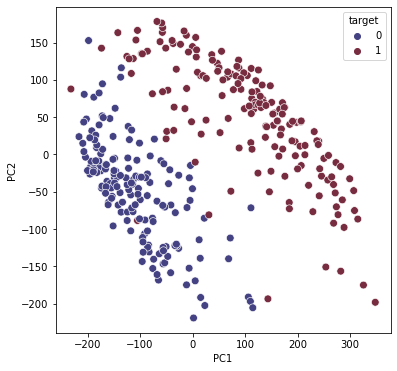

In [10]:
# Here I applied the PCA Technique I got helped with the PCA function from the link below:
# https://www.askpython.com/python/examples/principal-component-analysis
def PCA(X, num_components):
    # Step-1
    X_meaned = X - np.mean(X, axis=0)

    # Step-2
    cov_mat = np.cov(X_meaned, rowvar=False)

    # Step-3
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

    # Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    # Step-5
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

    # Step-6
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

    return X_reduced

target_for_PCA = 'target'
X_PCA = dataset1.iloc[:,dataset1.columns != target_for_PCA].values
y_PCA = dataset1.iloc[:,dataset1.columns == target_for_PCA].values

mat_reduced = PCA(X_PCA , 2) # I applied PCA on data to reduce the variable to 2 without losing the target 

principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(y_PCA,columns=[target_for_PCA])] , axis = 1) # adding the target on the new dataset

plt.figure(figsize = (6,6))
sns.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = target_for_PCA , s = 60 , palette= 'icefire')
print ("the data after appling the PCA:\n",principal_df)

In [11]:
# Now after I got new dataset called "principal_df" extracted form dataset1
# I want to apply LR on it to compare the result with the old result before appling PCA

In [12]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(mat_reduced, y_PCA, test_size=0.2, random_state=0)

print('% of positive samples in whole data:', sum(principal_df['target'] == 1) / len(principal_df))
print('% of positive samples in train set:', sum(y_train_PCA== 1) / len(X_train_PCA))
print('% of positive samples in test set:', sum(y_test_PCA== 1) / len(X_test_PCA))

regressor_PCA = LinearRegression()
regressor_PCA.fit(X_train_PCA, y_train_PCA)
score_PCA = regressor_PCA.score(X_test_PCA,y_test_PCA)

print (f"Score of LinearFegression after PCA is :{score_PCA}")
print("the intercept value is:",regressor_PCA.intercept_)
print("the coefiants are: ",regressor_PCA.coef_)

% of positive samples in whole data: 0.5076923076923077
% of positive samples in train set: [0.51538462]
% of positive samples in test set: [0.47692308]
Score of LinearFegression after PCA is :0.7559281720248304
the intercept value is: [0.51472094]
the coefiants are:  [[0.00258654 0.00317506]]


In [13]:
print (f"Score of Linear Regression before PCA is :{score_LR}")
print (f"Score of LinearFegression after PCA is :{score_PCA}")
# as we see here the score before PCA better than After PCA so I will work scince now on the dataset1 which is the data before PCA

Score of Linear Regression before PCA is :0.8012264236106603
Score of LinearFegression after PCA is :0.7559281720248304


In [14]:
# I seprated the data here to apply LogisticRegression and as we see here the data is siprated equaly


# split data
x_train_LO, x_test_LO, y_train_LO, y_test_LO = train_test_split(dataset1.loc[:,dataset1.columns != 'target' ], dataset1['target'],
                                                    test_size=0.2, stratify=dataset1['target'])

# find and print the proportion of positive samples in train and test sets, make sure they are approx same
print('% of positive samples in whole data:', sum(dataset1['target'] == 1) / len(dataset1))
print('% of positive samples in train set:', sum(y_train_LO== 1) / len(x_train_LO))
print('% of positive samples in test set:', sum(y_test_LO== 1) / len(x_test_LO))

% of positive samples in whole data: 0.5076923076923077
% of positive samples in train set: 0.5076923076923077
% of positive samples in test set: 0.5076923076923077


In [15]:
# Appliing Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(random_state=0).fit(x_train_LO, y_train_LO)
y_pred_LO = clf.predict(x_test_LO)

# I know That the Accuracy is the same of score but I do not know why I print it too 
print('Testing accuracy Logistic Regression= {}'.format(metrics.accuracy_score(y_test_LO, y_pred_LO)))
print('Testing precision Logistic Regression= {}'.format(metrics.precision_score(y_test_LO, y_pred_LO)))
print('Testing recall Logistic Regression= {}'.format(metrics.recall_score(y_test_LO, y_pred_LO)))
print('Logistic Regression score = {}'.format(clf.score(x_test_LO, y_test_LO)))


Testing accuracy Logistic Regression= 0.9846153846153847
Testing precision Logistic Regression= 0.9705882352941176
Testing recall Logistic Regression= 1.0
Logistic Regression score = 0.9846153846153847


In [16]:
# Appliing GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gauss_nb = GaussianNB()
gauss_nb.fit(x_train_LO, y_train_LO)
y_pred_GNB = gauss_nb.predict(x_test_LO)

print('Testing accuracy GaussianNB= {}'.format(metrics.accuracy_score(y_test_LO, y_pred_GNB)))
print('Testing precision GaussianNB= {}'.format(metrics.precision_score(y_test_LO, y_pred_GNB)))
print('Testing recall GaussianNB= {}'.format(metrics.recall_score(y_test_LO, y_pred_GNB)))
print('GaussianNB score = {}'.format(gauss_nb.score(x_test_LO, y_test_LO)))


Testing accuracy GaussianNB= 0.9846153846153847
Testing precision GaussianNB= 0.9705882352941176
Testing recall GaussianNB= 1.0
GaussianNB score = 0.9846153846153847


In [17]:
# Appliing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_KNN = scaler.fit_transform(x_train_LO)
x_test_KNN = scaler.transform(x_test_LO)

# Appliing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_train_KNN, y_train_LO)
y_pred_KNN = knn.predict(x_test_KNN)

print('Testing accuracy KNeighborsClassifier= {}'.format(metrics.accuracy_score(y_test_LO, y_pred_KNN)))
print('Testing precision KNeighborsClassifier= {}'.format(metrics.precision_score(y_test_LO, y_pred_KNN)))
print('Testing recall KNeighborsClassifier= {}'.format(metrics.recall_score(y_test_LO, y_pred_KNN)))
print('KNeighborsClassifier score = {}'.format(knn.score(x_test_KNN, y_test_LO)))

Testing accuracy KNeighborsClassifier= 1.0
Testing precision KNeighborsClassifier= 1.0
Testing recall KNeighborsClassifier= 1.0
KNeighborsClassifier score = 1.0


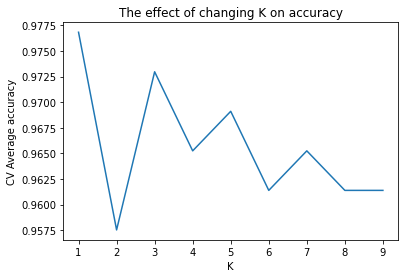

Best K: 1


In [18]:
# Appling cross_val
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
%matplotlib inline

Ks = list(range(1, 10))
cv_scores = []
for K in Ks:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, x_train_KNN, y_train_LO,
                             cv=7, scoring='accuracy')
    avg_score = np.mean(scores)
    cv_scores.append(avg_score)

plt.title('The effect of changing K on accuracy')
plt.plot(Ks, cv_scores)
plt.xlabel('K')
plt.xticks(Ks)
plt.ylabel('CV Average accuracy')
plt.show()
print('Best K:', Ks[np.argmax(cv_scores)])

In [19]:

from sklearn.model_selection import GridSearchCV

# Modify the next lines to run GridSearchCV with cv=7
# I will be honest I did not understand this algorithm very much so I copy paste it from the lab-session4 solution - I am sorry
param_grid = {'n_neighbors':list(range(1, 10)),
              'weights':['uniform', 'distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
              }

grid_search_clf = GridSearchCV(estimator=KNeighborsClassifier(),
                               cv=7, scoring='accuracy',
                               param_grid=param_grid
                               )

grid_search_clf.fit(x_train_KNN, y_train_LO)
means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r"
#        % (mean, std * 2, params))
#print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

y_pred_KNN = grid_search_clf.predict(x_test_KNN)

print('Testing accuracy grid_search_clf= {}'.format(metrics.accuracy_score(y_test_LO, y_pred_KNN)))
print('Testing precision grid_search_clf= {}'.format(metrics.precision_score(y_test_LO, y_pred_KNN)))
print('Testing recall grid_search_clf= {}'.format(metrics.recall_score(y_test_LO, y_pred_KNN)))
print('grid_search_clf score = {}'.format(grid_search_clf.score(x_test_KNN, y_test_LO)))


Best parameters set found on development set:

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Testing accuracy grid_search_clf= 0.9692307692307692
Testing precision grid_search_clf= 0.9428571428571428
Testing recall grid_search_clf= 1.0
grid_search_clf score = 0.9692307692307692


In [20]:
# now we came to the comparison
print (f"Score of Linear Regression before PCA is :{score_LR}") #0.8012264236106603
print('Logistic Regression score = {}'.format(clf.score(x_test_LO, y_test_LO))) #0.9384615384615385
print('GaussianNB score = {}'.format(gauss_nb.score(x_test_LO, y_test_LO))) #0.9538461538461539
print('grid_search_clf score = {}'.format(grid_search_clf.score(x_test_KNN, y_test_LO))) #0.9384615384615385
# as we see here the GNB has the highest score it might have some debug problems or not I am not sure! XD 

Score of Linear Regression before PCA is :0.8012264236106603
Logistic Regression score = 0.9846153846153847
GaussianNB score = 0.9846153846153847
grid_search_clf score = 0.9692307692307692


In [21]:
# Now I created defrent data from dataset1 by applying PCA on it
# I used the official PCA package not my function (just incase there was some problem in my PCA function)

In [22]:
# train the dataset using the PCA components using GNB model where the ML model is LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# create a standard scaler, pca with the found number of components and logistic regression model 
_sc = StandardScaler()
_pca = PCA(n_components = 2)
_model = LogisticRegression()

log_regress_model_pip = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])
random_state = 20
X_train, X_test, y_train, y_test = \
    train_test_split(X_PCA, y_PCA, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)
print('% of positive samples in train set:', sum(y_train== 1) / len(X_train))
print('% of positive samples in test set:', sum(y_test== 1) / len(X_test))
log_regress_model_pip.fit(X_train,y_train)
print (f"The score of GNB model when LogisticRegression model were applied {log_regress_model_pip.score(X_test,y_test)}")


% of positive samples in train set: [0.49779736]
% of positive samples in test set: [0.53061224]
The score of GNB model when LogisticRegression model were applied 0.9693877551020408


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
# train the dataset using the PCA components using GNB model where the ML model is GaussianNB
_sc = StandardScaler()
_pca = PCA(n_components = 3)
_model = GaussianNB()

GNB_model_pip = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('gaussianNB', _model)
])
random_state = 20
X_train, X_test, y_train, y_test = \
    train_test_split(X_PCA, y_PCA, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)
print('% of positive samples in train set:', sum(y_train== 1) / len(X_train))
print('% of positive samples in test set:', sum(y_test== 1) / len(X_test))
GNB_model_pip.fit(X_train,y_train)
print (f"The score of GNB model when GaussianNB model were applied {GNB_model_pip.score(X_test,y_test)}")


% of positive samples in train set: [0.49779736]
% of positive samples in test set: [0.53061224]
The score of GNB model when GaussianNB model were applied 0.9897959183673469


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# train the dataset using the PCA components using GNB model where the ML model is KNN_model



_sc = StandardScaler()
_pca = PCA(n_components = 3)
_model = KNeighborsClassifier()

KNN_model_pip = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('kneigbhborsclassifier', _model)
])
random_state = 20
X_train, X_test, y_train, y_test = \
    train_test_split(X_PCA, y_PCA, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)


print('% of positive samples in train set:', sum(y_train== 1) / len(X_train))
print('% of positive samples in test set:', sum(y_test== 1) / len(X_test))
KNN_model_pip.fit(X_train,y_train)
y_pred = KNN_model_pip.predict(X_test)
print (f"The score of GNB model when KNN model were applied {KNN_model_pip.score(X_test,y_test)}")

% of positive samples in train set: [0.49779736]
% of positive samples in test set: [0.53061224]
The score of GNB model when KNN model were applied 0.46938775510204084


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [25]:
# After PCA:
#The score of GNB model when LogisticRegression model were applied 0.9693877551020408
#The score of GNB model when GaussianNB model were applied 0.9897959183673469
#The score of GNB model when KNN model were applied 0.46938775510204084

#AS we see here the GaussianNB model is the best after PCA = 0.9897959183673469
# Before PCA: GaussianNB has also the highest score = 0.9538461538461539

#after PCA win but that is wierd: because I thought the with more feature the model will detect better

In [26]:
# how ever I hope I covered every thing here I do not thing there is a lot more to put in the pdf file I will do my best there.
# kind Regard